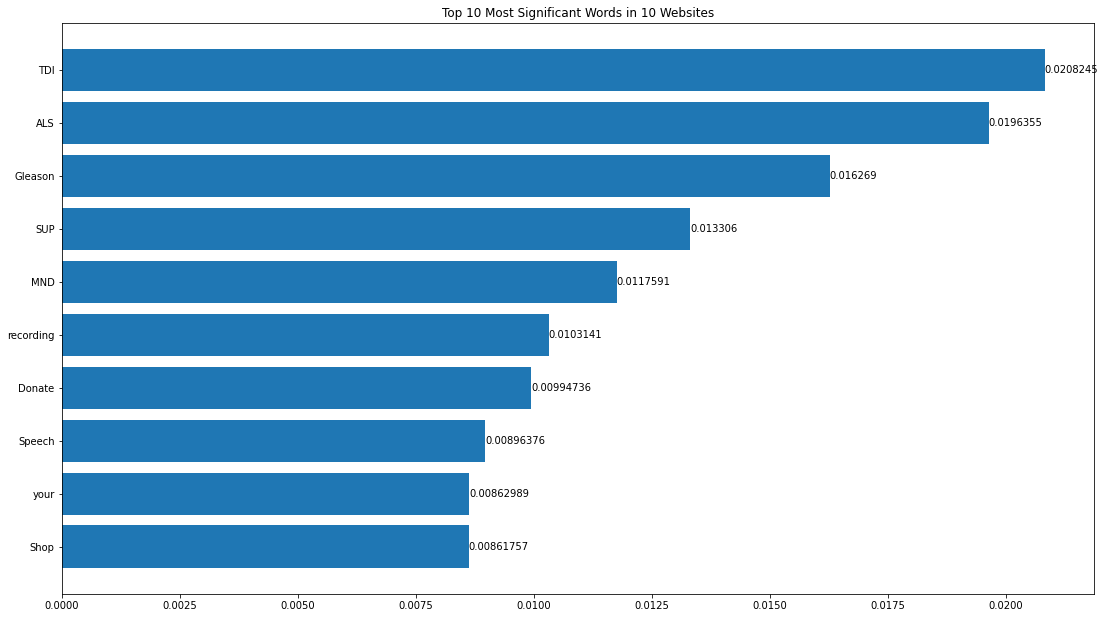

In [1]:
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import defaultdict, OrderedDict
import itertools

urls = [
        "https://ai.googleblog.com/2019/08/project-euphonias-personalized-speech.html",
        "https://teamgleason.org/projecteuphonia/",
        "https://accessible360.com/accessible360-blog/2021-02-28-project-euphonia-googles-speech-recognition-project/",
        "https://www.als.net/news/project-euphonia-age-of-ai/",
        "https://www.speechuncensored.com/podcastepisodes/s3e8",
        "https://www.als.net/news/project-euphonia/",
        "https://www.pathlms.com/atia/courses/22604",
        "https://artificialintelligence-news.com/2019/08/14/google-project-euphonia-voice-recognition/",
        "https://www.mndnsw.asn.au/blog/248-december-2020/1515-project-euphonia-volunteers-needed.html",
        "https://bigvoicecommunications.co.uk/how-google-is-redesigning-voice-recognition-technology-for-people-with-speech-impairments/",
]

def word_list(urls):

    all_words = []
    
    for url in urls:
        html = urlopen(url).read()
        soup = BeautifulSoup(html, features="html.parser")
        for script in soup(["script", "style"]):
            script.extract()  
        text = soup.get_text()
        text = re.sub(r'[^\w]', ' ', text)
        words = text.split(' ')
        words = [x for x in words if x]
        all_words.append(words)

    return all_words

def list_struct(): return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

all_words = word_list(urls)

words_tf = defaultdict(list_struct)
words_idf = {}
words_tf_idf = defaultdict(list_struct)
words_tf_idf_sum = {}

for i in range(len(all_words)):
    words = all_words[i]
    n = len(words)
    for word in words:
        tf_list = words_tf[word]
        tf_list[i] = ((tf_list[i] * n) + 1) / n
        words_tf[word] = tf_list

for key in words_tf.keys():
    zero = words_tf[key].count(0)
    f = 10 - zero

    words_idf[key] = math.log10(10/f)

for key in words_tf.keys():
    Sum = 0.0
    for i in range(len(words_tf[key])):
        tf = words_tf[key][i]
        score = tf * words_idf[key]
        Sum += score
        words_tf_idf[key][i] = score
    words_tf_idf_sum[key] = Sum

words_tf_idf_sum = dict(sorted(words_tf_idf_sum.items(), key=lambda item: item[1], reverse=True))

sliced_words_tf_idf_sum = dict(itertools.islice(words_tf_idf_sum.items(), 10))


x = list(sliced_words_tf_idf_sum.keys())
y = list(sliced_words_tf_idf_sum.values())

ind = np.arange(len(y))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

ax.bar_label(ax.containers[0])
plt.gca().invert_yaxis()
plt.title("Top 10 Most Significant Words in 10 Websites")
plt.show()